In [1]:
import os
import shutil
import pydub
import matplotlib.pyplot as plt

Create a copy of raw audios directory

In [2]:
shutil.copytree('raw_audios', 'audios', dirs_exist_ok=True)

'audios'

Read and write a audio file using pydub python package

In [3]:
audio = pydub.AudioSegment.from_file("audios/Mohammad_N.ogg")
audio

In [4]:
audio.export("just_for_test/Mohammad.mp3")

<_io.BufferedRandom name='just_for_test/Mohammad.mp3'>

Concatenate two audio files from the same person

In [5]:
audio_1 = pydub.AudioSegment.from_file("audios/Khadijeh_1.ogg")
audio_2 = pydub.AudioSegment.from_file("audios/Khadijeh_2.ogg")

result = audio_1 + audio_2
result.export("audios/Khadijeh.ogg")

os.remove("audios/Khadijeh_1.ogg")
os.remove("audios/Khadijeh_2.ogg")

In [6]:
audio_1 = pydub.AudioSegment.from_file("audios/Parsa_1.ogg")
audio_2 = pydub.AudioSegment.from_file("audios/Parsa_2.ogg")

result = audio_1 + audio_2
result.export("audios/Parsa.ogg")

os.remove("audios/Parsa_1.ogg")
os.remove("audios/Parsa_2.ogg")

In [7]:
audio_1 = pydub.AudioSegment.from_file("audios/Parisa_1.ogg")
audio_2 = pydub.AudioSegment.from_file("audios/Parisa_2.ogg")

result = audio_1 + audio_2
result.export("audios/Parisa.ogg")

os.remove("audios/Parisa_1.ogg")
os.remove("audios/Parisa_2.ogg")

In [8]:
audio_1 = pydub.AudioSegment.from_file("audios/Nahid_1.ogg")
audio_2 = pydub.AudioSegment.from_file("audios/Nahid_2.ogg")

result = audio_1 + audio_2
result.export("audios/Nahid.ogg")

os.remove("audios/Nahid_1.ogg")
os.remove("audios/Nahid_2.ogg")

In [9]:
audio_1 = pydub.AudioSegment.from_file("audios/Mohammadali_1.ogg")
audio_2 = pydub.AudioSegment.from_file("audios/Mohammadali_2.ogg")

result = audio_1 + audio_2
result.export("audios/Mohammadali.ogg")

os.remove("audios/Mohammadali_1.ogg")
os.remove("audios/Mohammadali_2.ogg")

In [10]:
audio_1 = pydub.AudioSegment.from_file("audios/Morteza_1.m4a")
audio_2 = pydub.AudioSegment.from_file("audios/Morteza_2.m4a")

result = audio_1 + audio_2
result.export("audios/Morteza.ogg")

os.remove("audios/Morteza_1.m4a")
os.remove("audios/Morteza_2.m4a")

Detect silences in audio file and remove them

In [11]:
audio = pydub.AudioSegment.from_file("audios/Sajjad.ogg")
audio

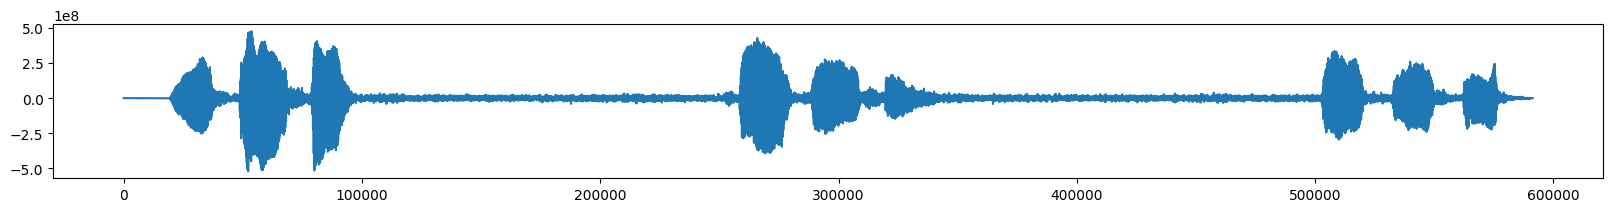

In [12]:
audio_array = audio.get_array_of_samples()

plt.figure(figsize=(20, 2))
plt.plot(audio_array)
plt.show()

In [13]:
audio_chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
audio_chunks

In [14]:
result = sum(audio_chunks)
result

Detect silences in all audio files and remove them, then save new audios as `.wav` files and remove `.ogg` files

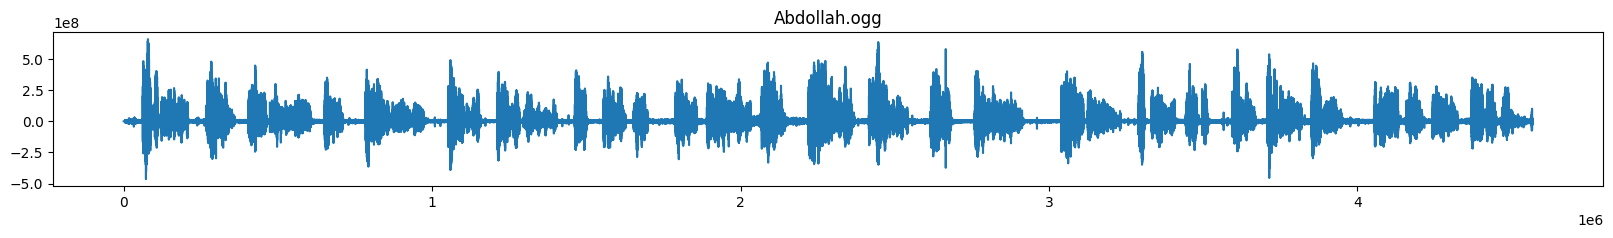

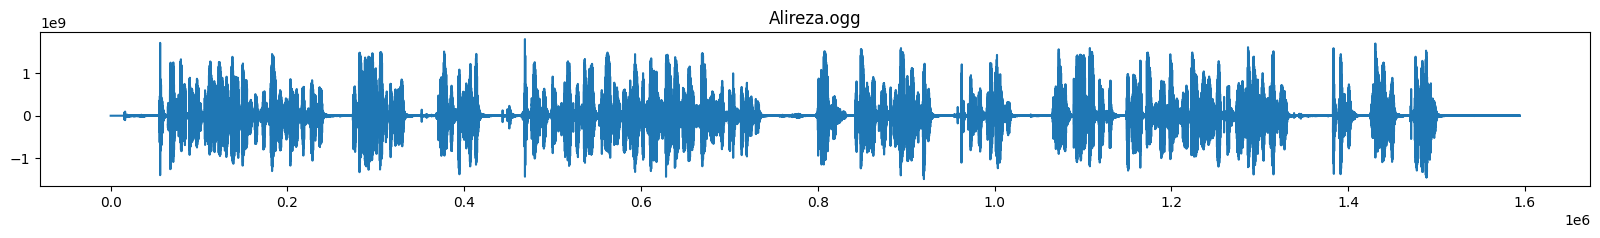

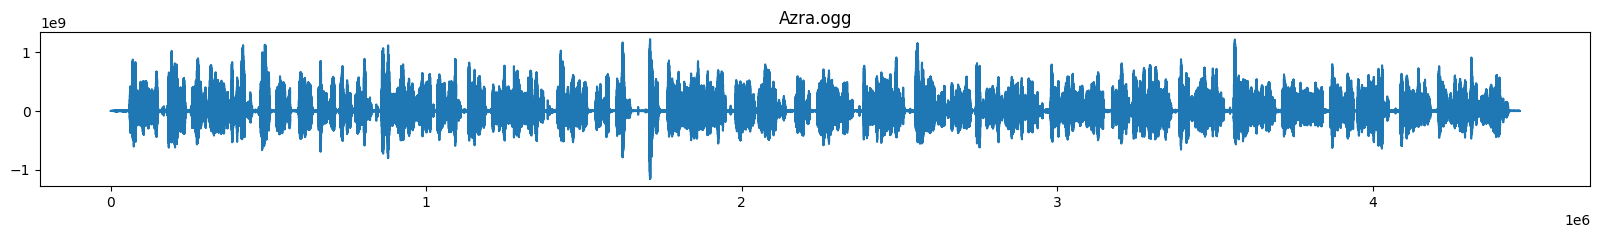

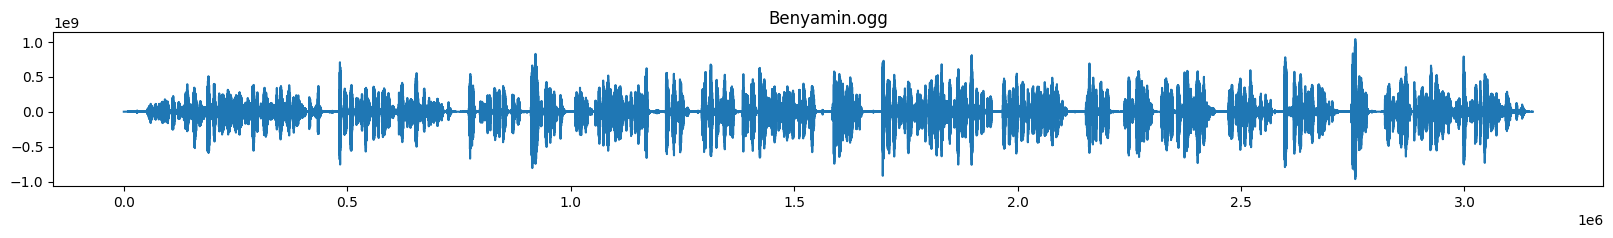

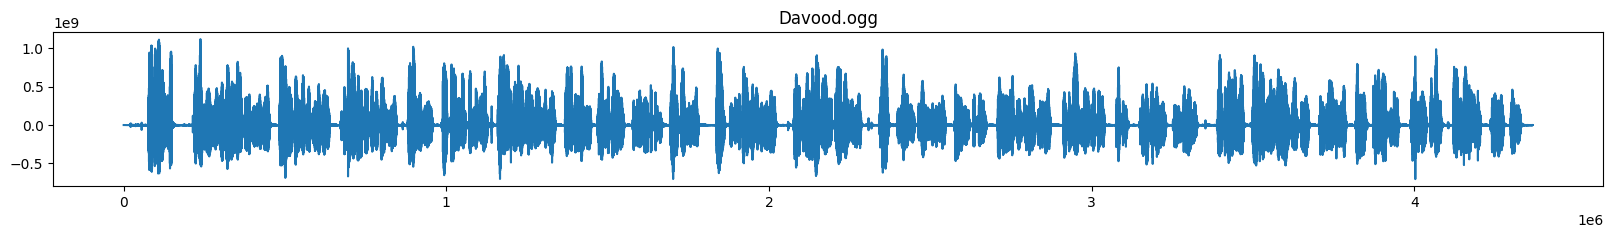

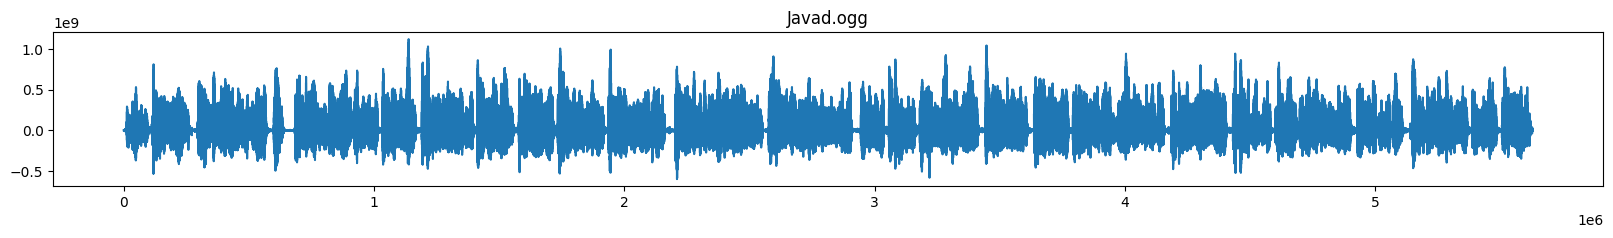

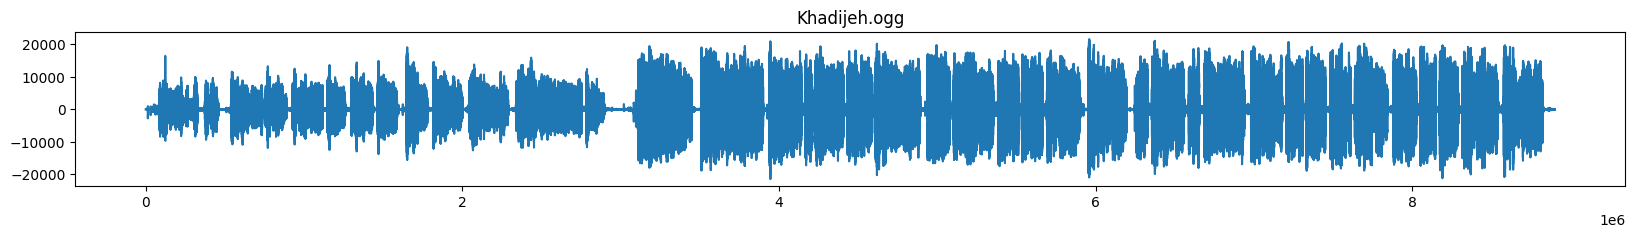

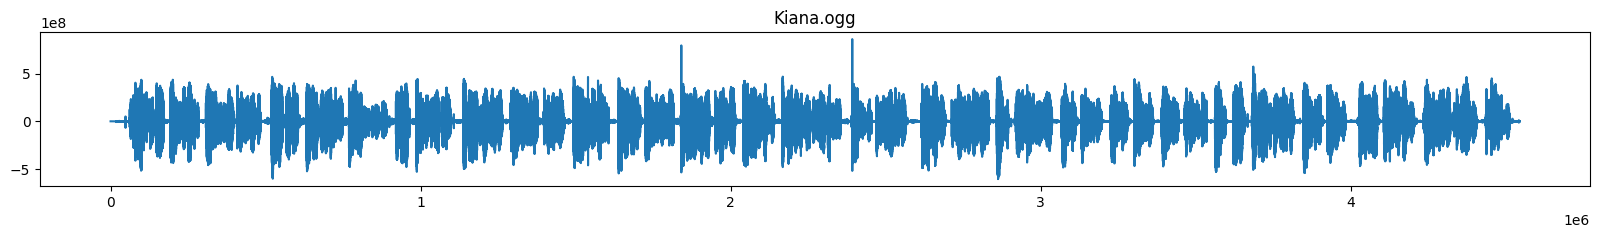

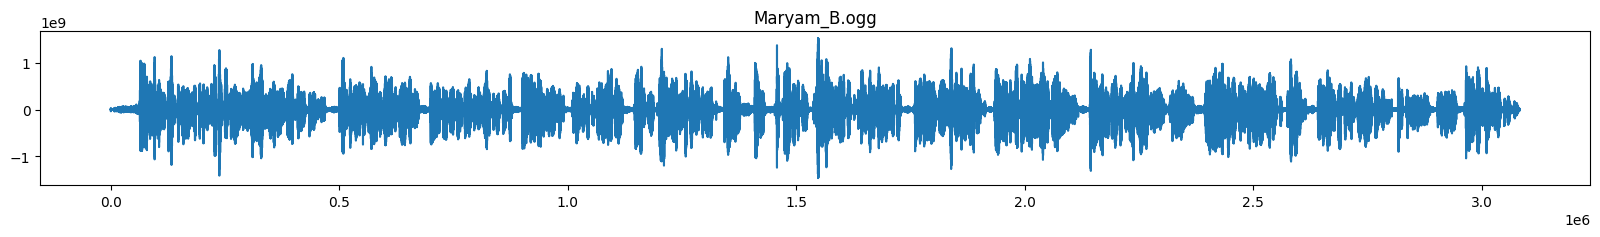

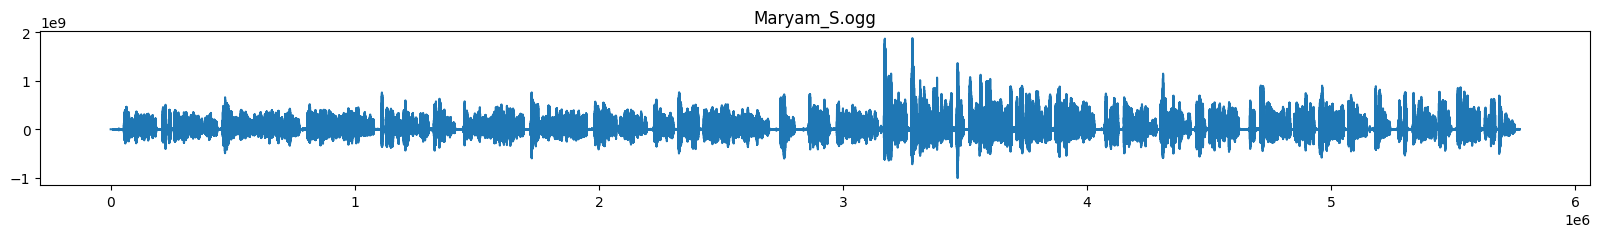

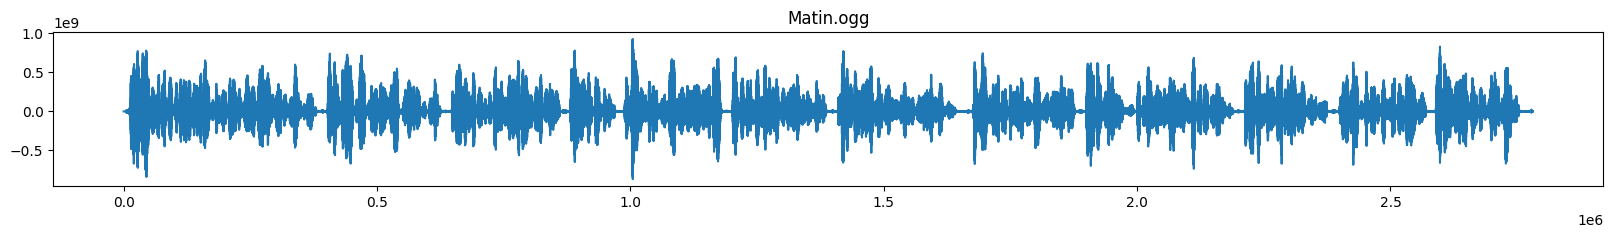

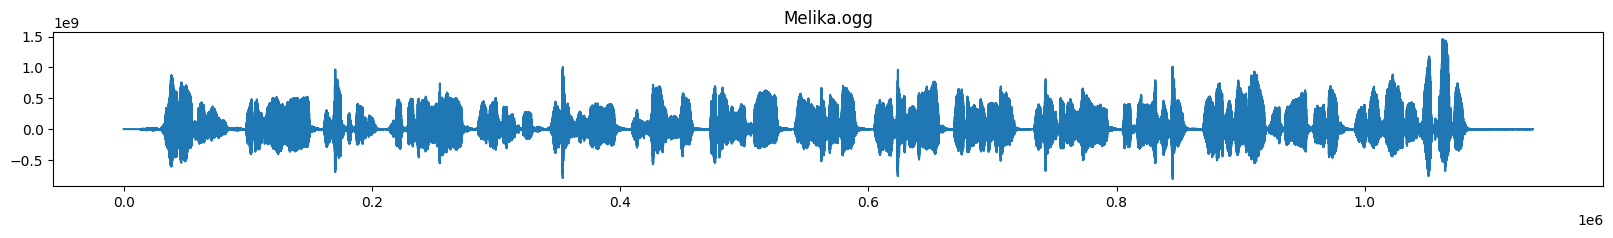

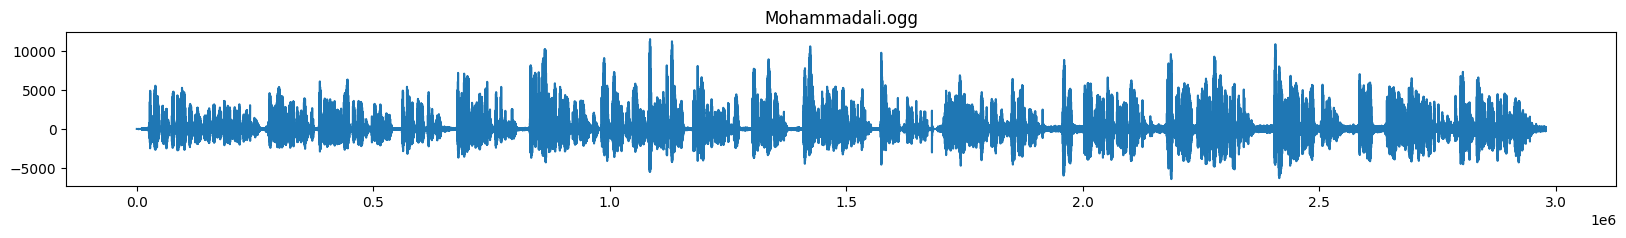

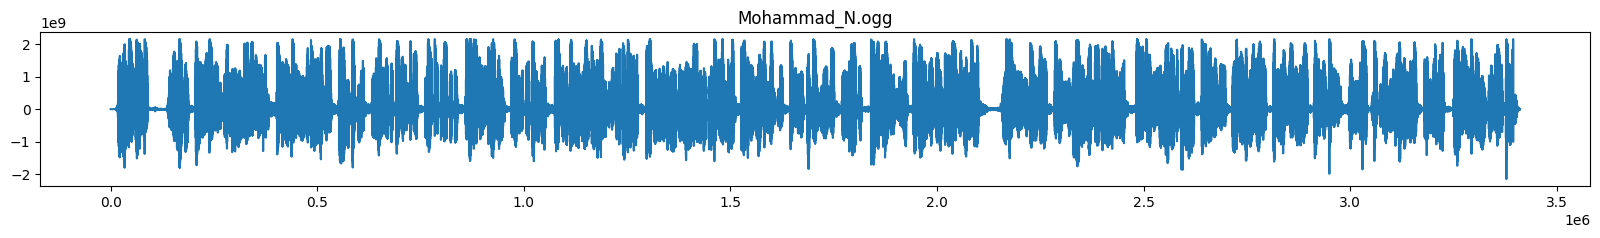

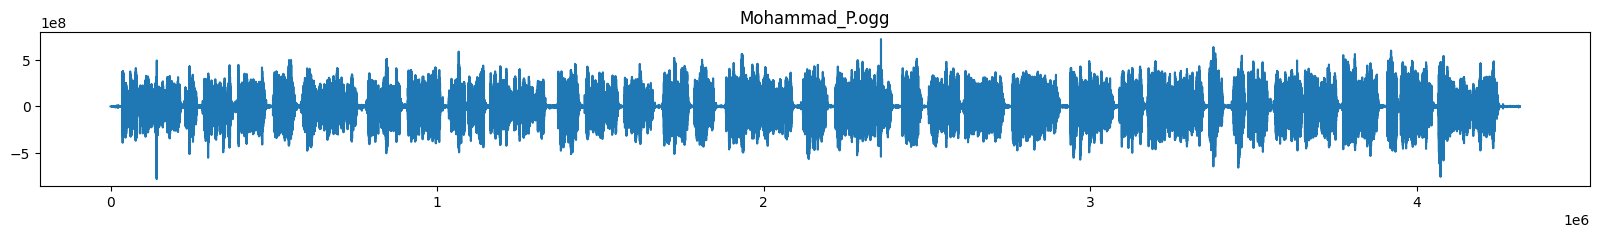

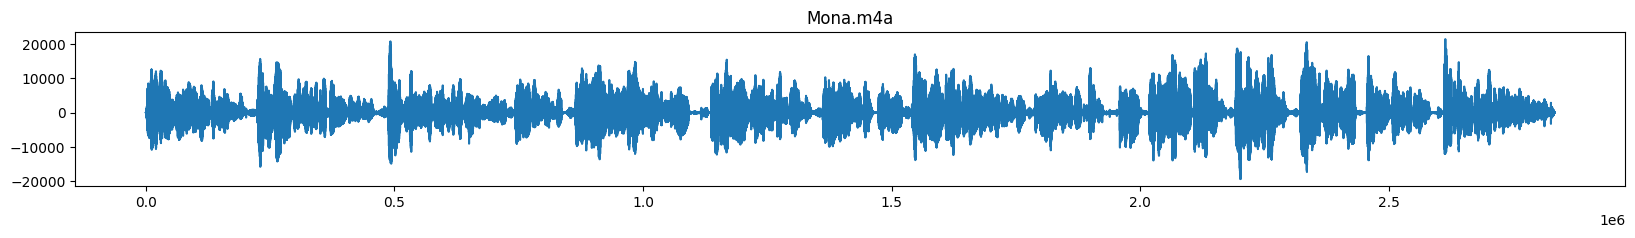

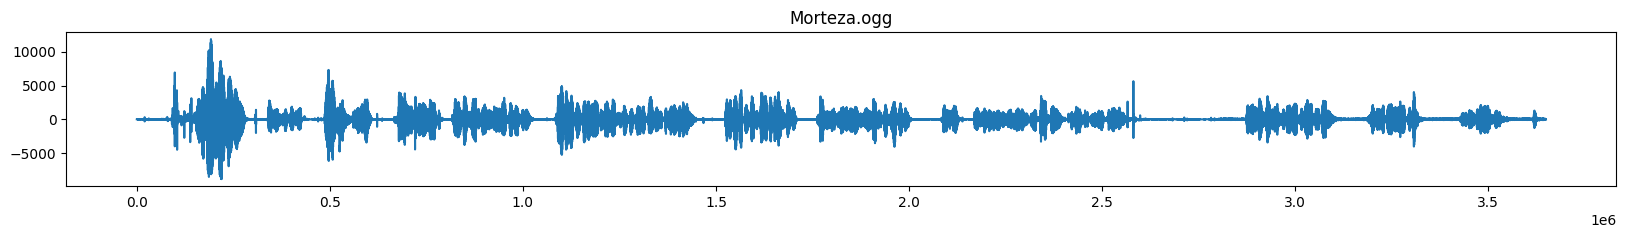

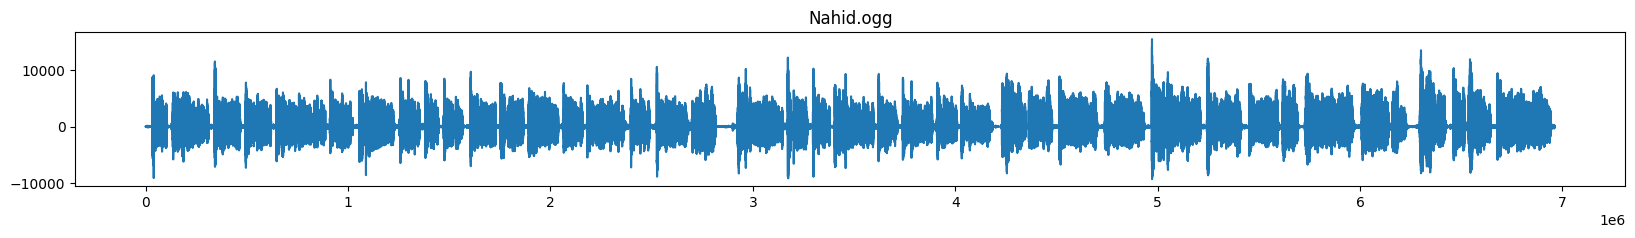

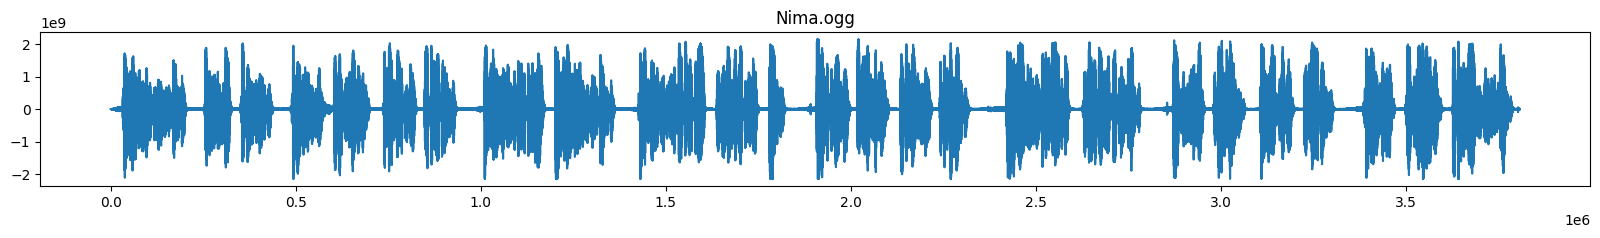

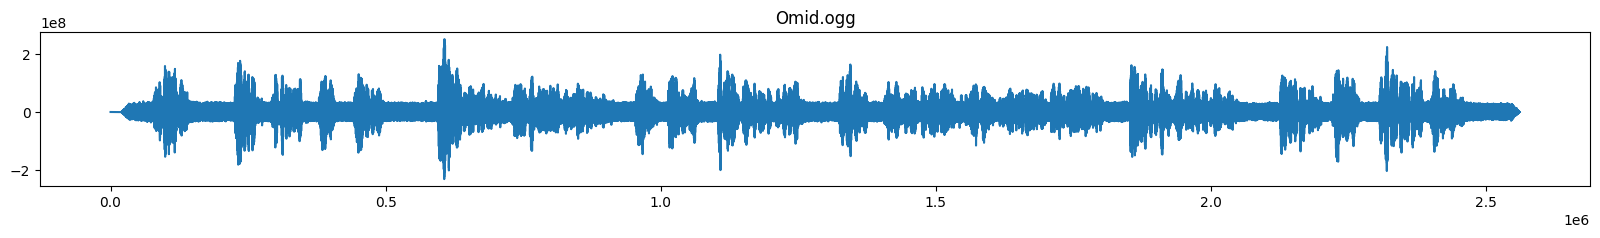

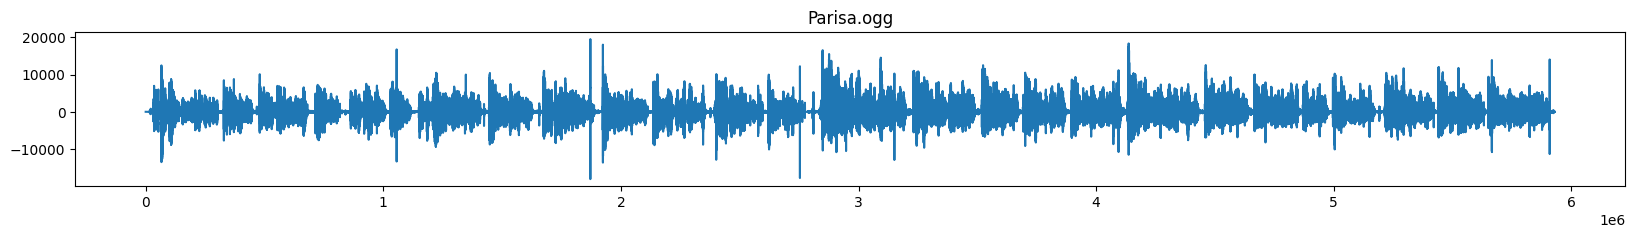

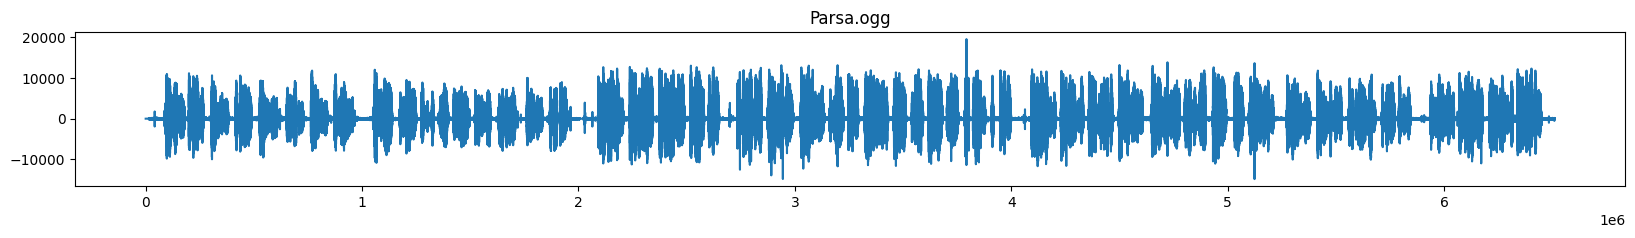

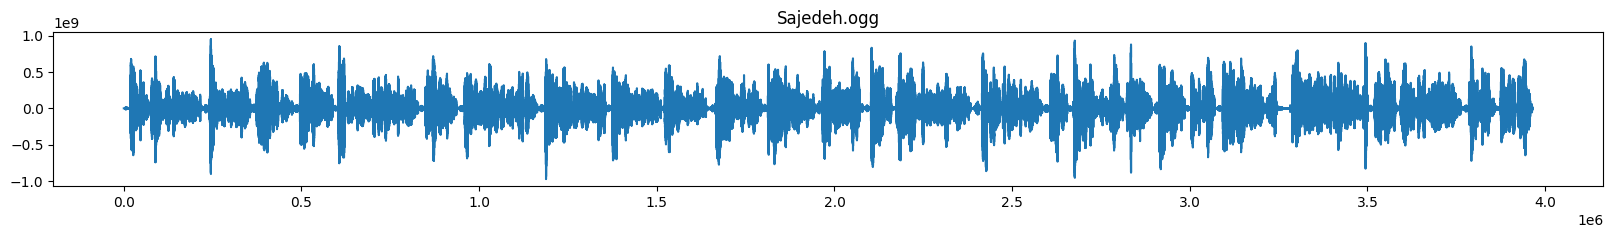

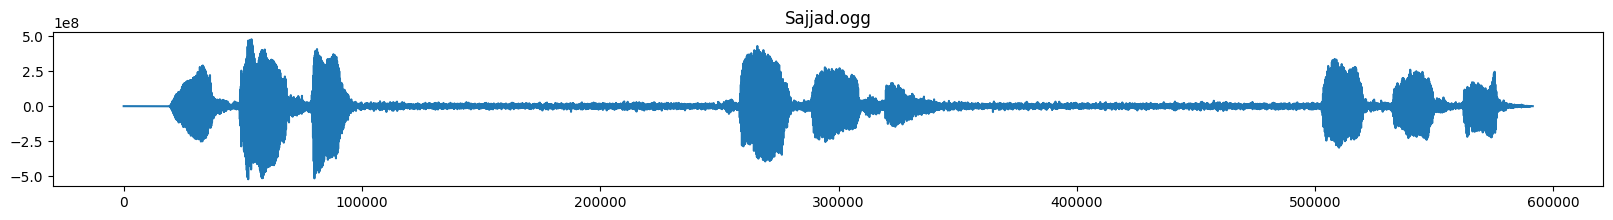

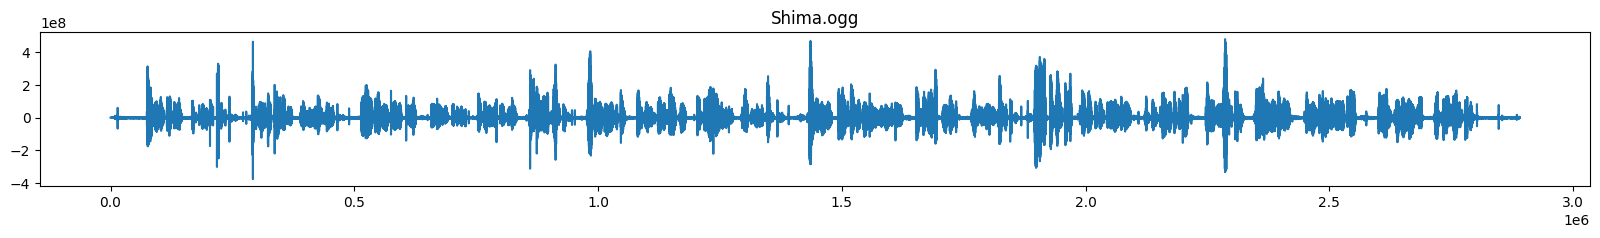

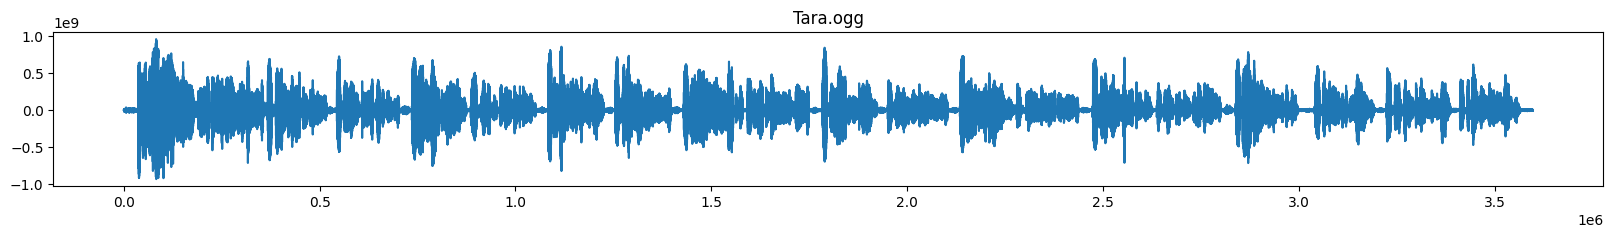

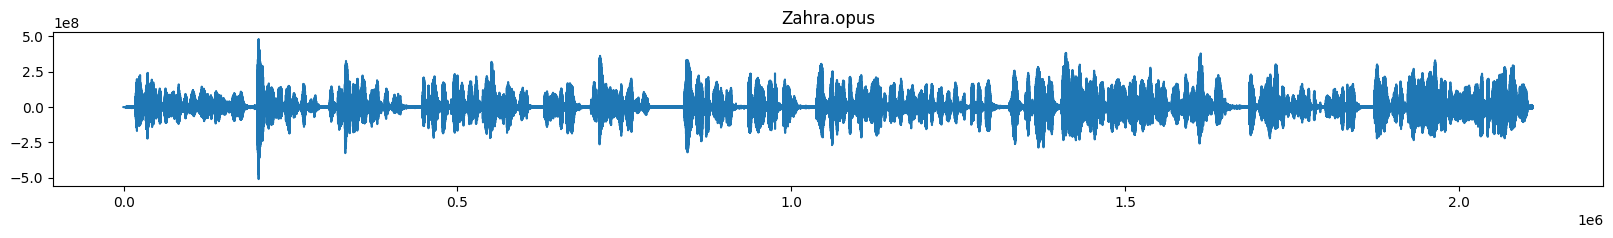

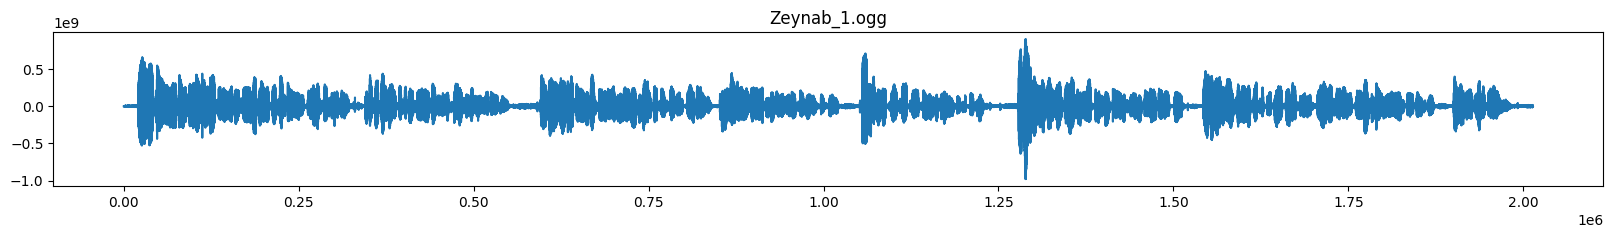

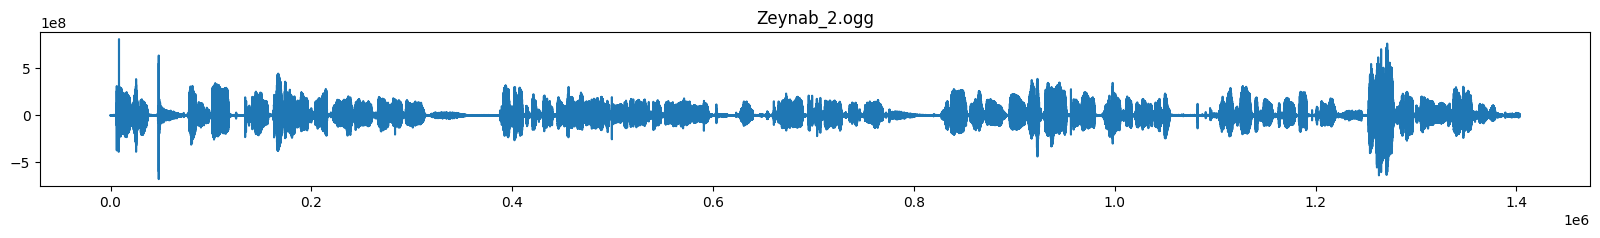

In [15]:
show_plot = True

for file_name in os.listdir("audios"):
    file_path = os.path.join("audios", file_name)
    audio = pydub.AudioSegment.from_file(file_path)

    if show_plot:
        audio_array = audio.get_array_of_samples()
        plt.figure(figsize=(20, 2))
        plt.plot(audio_array)
        plt.title(file_name)
        plt.show()

    # preprocessing
    audio = audio.set_sample_width(2)  # convert to 16-bit (2 bytes per sample) to avoid tensorflow error
    audio = audio.set_frame_rate(48000)
    audio = audio.set_channels(1)  # convert stereo audio to mono audio to avoid tensorflow error

    chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
    result = sum(chunks)

    person_name = file_name.split(".")[0]
    result_path = os.path.join("audios", person_name+".wav")
    
    # save wav file and remove ogg file
    result.export(result_path, format="wav")
    os.remove(file_path)

Split each audio file to 1 seconds audio files and save them to `dataset` directory

In [17]:
for file_name in os.listdir("audios"):
    file_path = os.path.join("audios", file_name)
    audio = pydub.AudioSegment.from_file(file_path)

    person_name = file_name.split(".")[0]
    os.makedirs(os.path.join("dataset", person_name), exist_ok=True)

    chunks = pydub.utils.make_chunks(audio, 1000)
    for i, chunk in enumerate(chunks):
        if len(chunk) >= 1000:
            result_path = os.path.join("dataset", person_name, f"voice_{i}.wav")
            chunk.export(result_path, format="wav")